In [1]:
import matplotlib.pylab as plt

In [2]:
import pandas as pd

data=pd.read_csv("/Users/fahad/Desktop/query-hive-5142_harvard_stored_coordinates_v2.csv")
data['ones']=1

In [3]:
filtered_data=data#[(data['ghash']=='drt3j9t') | (data['ghash']=='drt3j9v')]

In [4]:
import matplotlib.pylab as plt
lats=[];
lngs=[];
for i in filtered_data.iterrows():
    if i[1]['paname']=='Capital One Café':
        lats.append(i[1]['lat'])
        lngs.append(i[1]['lng'])



/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x118dde7b8> has a label of '_c10' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.7/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x118e8db38> has a label of '_c10' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


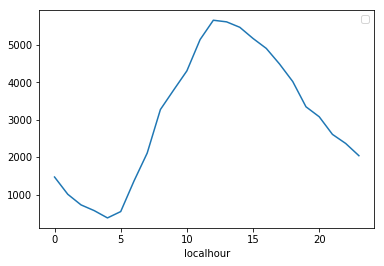

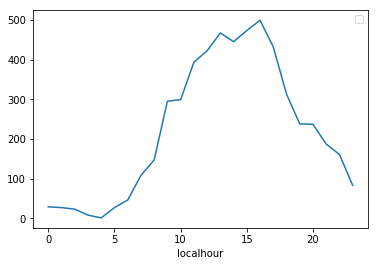

In [6]:
import matplotlib.pylab as plt
%matplotlib inline
sub=data[data['paname']=='Harvard University'].groupby('localhour').sum()
sub.plot(y='_c10')
sub=data[data['paname']=='Harvard Coop'].groupby('localhour').sum()
sub.plot(y='_c10')

In [132]:
a=data.groupby('paname').sum()

a.sort_values('ones',ascending=False)

,lat,lng,localyear,localmonth,localday,localhour,duration,_c10,ones
paname,,,,,,,,,
Harvard University,2.167831e+06,-3.638428e+06,103242898,293004,896824,691715,16757485,73500,51161
CVS Pharmacy,2.097089e+05,-3.519678e+05,9987082,28591,84235,72075,1487388,7055,4949
Russell House Tavern,1.770777e+05,-2.972086e+05,8433222,24373,69291,61886,1237448,6123,4179
Pinkberry,1.702988e+05,-2.858273e+05,8110342,22540,73406,57409,881417,5592,4019
Harvard Coop,1.580112e+05,-2.652041e+05,7525122,21832,63469,53405,1202313,5360,3729
The Hahvahd Tour,1.575874e+05,-2.644916e+05,7504942,21891,60754,52004,1176531,5354,3719
John Harvard's Brew House,1.283038e+05,-2.153494e+05,6110504,17685,49230,44449,1084427,4641,3028
Starbucks,1.117384e+05,-1.875415e+05,5321466,14768,46386,37512,789937,3497,2637
Harvard Yard,1.061042e+05,-1.780758e+05,5053072,12664,54239,31195,457215,3267,2504


In [ ]:

lats_corrected=[];
lngs_corrected=[];
for i in range(0,len(lats)):
    x,y=reverse_getPointLatLng(lats[i],lngs[i]);
    lats_corrected.append(x);
    lngs_corrected.append(y);

In [1]:
import urllib
import matplotlib.pylab as plt
%matplotlib inline
import math


zoomlevel=16;


#bottom left corner
w=640;
h=640;
zoom=17;
lat=42.372648;
lng=-71.117057;
scale=2;

#query="https://www.mapquestapi.com/staticmap/v5/map?key=dnWWKMm4BMsnCcpCn6tWUhItsEPAENAN&format=PNG&boundingBox="+str(tr_corner[0])+","+str(tr_corner[1])+","+str(bl_corner[0])+","+str(bl_corner[1])+"&margin=0&size="+str(w)+","+str(h)+"@"+str(z)+"x";
query="http://maps.googleapis.com/maps/api/staticmap?center="+str(lat)+","+str(lng)+"&zoom="+str(zoom)+"&size="+str(w)+"x"+str(h)+"&scale="+str(scale)+"&maptype=roadmap"
print(query);
pic=urllib.request.urlretrieve(query, "harvard_square.png")



def getPointLatLng(x, y):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    pointLat = lat - degreesPerPixelY * ( y - h / 2)
    pointLng = lng + degreesPerPixelX * ( x  - w / 2)

    return (pointLat, pointLng)

def reverse_getPointLatLng(pointLat, pointLng):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    #pointLat = lat - degreesPerPixelY * ( y - h / 2)
    #pointLng = lng + degreesPerPixelX * ( x  - w / 2)
    y=scale*((2*(lat-pointLat)/(degreesPerPixelY))+h)/2;
    x=scale*((2*(pointLng-lng)/(degreesPerPixelX))+w)/2;
    return (x, y)






http://maps.googleapis.com/maps/api/staticmap?center=42.372648,-71.117057&zoom=17&size=640x640&scale=2&maptype=roadmap


NameError: name 'lats_corrected' is not defined

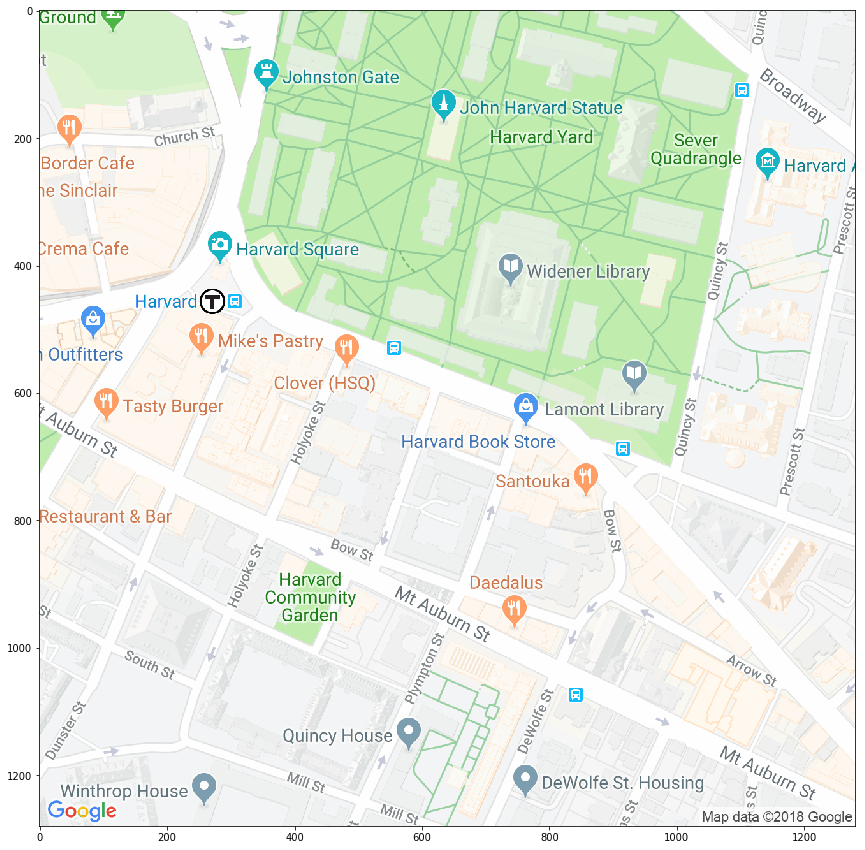

In [2]:
import matplotlib.pylab as plt
%matplotlib inline


pic=plt.imread('harvard_square.png')
plt.figure(figsize=(15,15))
plt.imshow(pic)
plt.plot(lats_corrected,lngs_corrected,'*')
plt.xlim([0,scale*640]);
plt.ylim([scale*640,6]);

In [135]:
w=1000;
h=1000;
z=2;

def getPointLatLng(x, y):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    pointLat = lat - degreesPerPixelY * ( y - h / 2)
    pointLng = lng + degreesPerPixelX * ( x  - w / 2)

    return (pointLat, pointLng)

def reverse_getPointLatLng(pointLat, pointLng):
    parallelMultiplier = math.cos(lat * math.pi / 180)
    degreesPerPixelX = 360 / math.pow(2, zoom + 8)
    degreesPerPixelY = 360 / math.pow(2, zoom + 8) * parallelMultiplier;
    #pointLat = lat - degreesPerPixelY * ( y - h / 2)
    #pointLng = lng + degreesPerPixelX * ( x  - w / 2)
    y=((2*(lat-pointLat)/(degreesPerPixelY))+h)/2;
    x=((2*(pointLng-lng)/(degreesPerPixelX))+w)/2;
    return (x, y)